## installing...

In [ ]:
!pip install giotto-tda

In [ ]:
!pip freeze

## importing...

In [5]:
from gtda.time_series import embedding, TakensEmbedding

In [6]:
import pandas as pd
import numpy as np


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import plotly.express as px

## loading data...

- Температура в Нью-Йорке
- Индекс Доу-Джонса


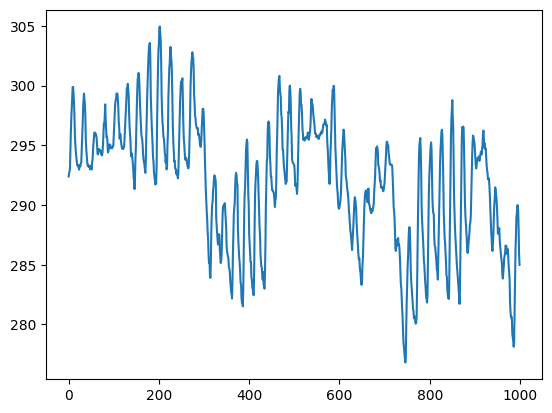

In [18]:
data_temp = pd.read_csv('temperature.csv')['New York'].dropna().values[-1000:]
plt.plot(data_temp)
plt.show()

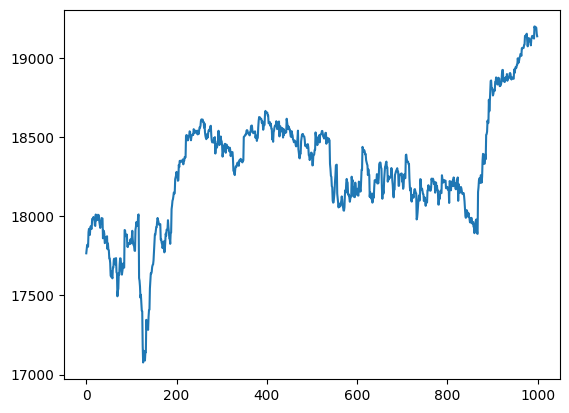

In [19]:
data_ind=pd.read_csv('/content/D&J-IND_150901_161130.txt')['<CLOSE>'].dropna().values[-1000:]
plt.plot(data_ind)
plt.show()

## Для выполнения задания используем библиотеку giotto...

In [37]:
optimal_delay_temp, optimal_dimension_temp = embedding.takens_embedding_optimal_parameters(
    data_temp, 100, 10, stride=1
    )

In [69]:
optimal_delay_ind, optimal_dimension_ind = embedding.takens_embedding_optimal_parameters(
    data_ind, 90, 10, stride=1
    )

In [70]:
data_temp.shape,data_ind.shape

((1000,), (1000,))

In [71]:
print('optimal params:')
{
    'temperature':(optimal_delay_temp,optimal_dimension_temp),
    'DJ index': (optimal_delay_ind,optimal_dimension_ind)

}

optimal params:


{'temperature': (17, 5), 'DJ index': (90, 7)}

### Трехмерный график фазового пространства для  для температуры




In [72]:
from sklearn.manifold import TSNE

In [73]:
ph_temp = TakensEmbedding(optimal_delay_temp, optimal_dimension_temp).fit_transform(data_temp.reshape(1, -1))[0]


In [74]:
tsne = TSNE(n_components=3, perplexity=30, n_iter=300)
ph_temp_3d = tsne.fit_transform(ph_temp)

In [75]:
cols=['x', 'y', 'z']
plot_3d = px.line_3d(pd.DataFrame(ph_temp_3d, columns=cols), x="x", y="y", z="z")
plot_3d.show()

### Трехмерный график фазового пространства для индекса Доу-Джонса



In [64]:
ph_ind = TakensEmbedding(optimal_delay_ind, optimal_dimension_ind).fit_transform(data_ind.reshape(1, -1))[0]
tsne = TSNE(n_components=3, perplexity=30, n_iter=300)
ph_ind_3d = tsne.fit_transform(ph_ind)

In [65]:
tsne = TSNE(n_components=3, perplexity=30, n_iter=300)
ph_ind_3d = tsne.fit_transform(ph_ind)

In [66]:
cols=['x', 'y', 'z']
line_3d = px.line_3d(pd.DataFrame(ph_ind_3d, columns=cols), x="x", y="y", z="z")
line_3d.show()